In [105]:
import General_f as Gf
import pandas as pd
pd.set_option("display.precision", 2)
import numpy as np
import importlib
import wx
import DQ_measure_f as DQf
import DQ_measure_f_frAAgile as DQf_f
from matplotlib import pyplot as plt
from IPython.display import display
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn' --- Para quitar los warnings de pandas y python

importlib.reload(Gf)
df,_ = Gf.check_df()

# Ideal

No valid DataFrame entered


,Columns,Non-NaN Count,Dtype,DtypeDetec
0,fechaHora,334080,object,"(Date, 100)"
1,codigoSerial,334080,int64,"(Number, 100)"
2,temperatura,217388,float64,"(Number, 100)"
3,humedad_relativa,217388,float64,"(Number, 100)"
4,pm1_df,217388,float64,"(Number, 100)"
5,pm10_df,217388,float64,"(Number, 100)"
6,pm25_df,217388,float64,"(Number, 100)"
7,pm10_nova,217388,float64,"(Number, 100)"
8,pm25_nova,217388,float64,"(Number, 100)"
9,latitud,217388,float64,"(Number, 100)"


Total length: 334080 rows


In [154]:
# Para conocer la cantidad de Valores y periodos. Los periodos serian la cantidad de sesiones, y los valores la cantidad de jugadoras. Las jugadoras aparecen 3 veces por sesión, por lo tanto la cantidad de valores es el número de jugadoras por 3
print("Sesiones: ",len(df['Sesion'].value_counts()))
print("Jugadoras: ",len(df['Jugadora'].value_counts()))

Sesiones:  33
Jugadoras:  13


In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [178]:
df.head(3)


,Jugadora,Sesion,Tipo,Posicion,Diasemana,Date,WeekCalendar,WeekTeam,WeekMatchDay,Starthour(t),FinalHour(t),NumSession/day,Session,TypeSession,Group,MatchDay,NumTotalSession,Selection,Repetition,DrillsDuration(t),PositioningDuration(t),Distance(m),ExplosiveDist(m),HIBD(m),[0-45]%(m),[45-65]%(m),[65-75]%(m),[75-85]%(m),[85-95]%(m),[95-100]%(m),[0-6]km/h(m),[6-9]km/h(m),[9-12]km/h(m),[12-15]km/h(m),[15-18]km/h(m),[18-21]km/h(m),[21-50]km/h(m),[0-45]%Cnt,[45-65]%Cnt,[65-75]%Cnt,[75-85]%Cnt,[85-95]%Cnt,[95-100]%Cnt,[0-6]km/hCnt,[6-9]km/hCnt,[9-12]km/hCnt,[12-15]km/hCnt,[15-18]km/hCnt,[18-21]km/hCnt,[21-50]km/hCnt,[0-45]%(ms),[45-65]%(ms),[65-75]%(ms),[75-85]%(ms),[85-95]%(ms),[95-100]%(ms),[0-6]km/h(ms),[6-9]km/h(ms),[9-12]km/h(ms),[12-15]km/h(ms),[15-18]km/h(ms),[18-21]km/h(ms),[21-50]km/h(ms),Accelerations(#),Decelerations(#),MAXAcc(m/s²),MAXDec(m/s²),AVGAcc(m/s²),AVGDec(m/s²),Dif.ACC/DEC,HighAccCnt,HighDecCnt(#),HighAcc(m),HighDec(m),HighAcc(ms),HighDec(ms),[01]m/s²(m),[12]m/s²(m),[23]m/s²(m),[34]m/s²(m),[45]m/s²(m),[56]m/s²(m),[610]m/s²(m),[-10]m/s²(m),[-2-1]m/s²(m),[-3-2]m/s²(m),[-4-3]m/s²(m),[-5-4]m/s²(m),[-6-5]m/s²(m),[-10-6]m/s²(m),[050]%(m),[5060]%(m),[6070]%(m),[7080]%(m),[8090]%(m),[90100]%(m),[-500]%(m),[-60-50]%(m),[-70-60]%(m),[-80-70]%(m),[-90-80]%(m),[-100-90]%(m),[01]m/s²Cnt,[12]m/s²Cnt,[23]m/s²Cnt,[34]m/s²Cnt,[45]m/s²Cnt,[56]m/s²Cnt,[610]m/s²Cnt,[-10]m/s²Cnt,[-2-1]m/s²Cnt,[-3-2]m/s²Cnt,[-4-3]m/s²Cnt,[-5-4]m/s²Cnt,[-6-5]m/s²Cnt,[-10-6]m/s²Cnt,[050]%Cnt,[5060]%Cnt,[6070]%Cnt,[7080]%Cnt,[8090]%Cnt,[90100]%Cnt,[-500]%Cnt,[-60-50]%Cnt,[-70-60]%Cnt,[-80-70]%Cnt,[-90-80]%Cnt,[-100-90]%Cnt,[01]m/s²(ms),[12]m/s²(ms),[23]m/s²(ms),[34]m/s²(ms),[45]m/s²(ms),[56]m/s²(ms),[610]m/s²(ms),[-10]m/s²(ms),[-2-1]m/s²(ms),[-3-2]m/s²(ms),[-4-3]m/s²(ms),[-5-4]m/s²(ms),[-6-5]m/s²(ms),[-10-6]m/s²(ms),[050]%(ms),[5060]%(ms),[6070]%(ms),[7080]%(ms),[8090]%(ms),[90100]%(ms),[-500]%(ms),[-60-50]%(ms),[-70-60]%(ms),[-80-70]%(ms),[-90-80]%(ms),[-100-90]%(ms),HRDuration,MAXHR(bpm),AVGHR(bpm),Avg(%ofMax),HighHR(m),HighHRCnt(#),HighHR(ms),[50-60]%(m),[60-70]%(m),[70-80]%(m),[80-90]%(m),[90-100]%(m),[100-200]%(m),[50-60]%Cnt,[60-70]%Cnt,[70-80]%Cnt,[80-90]%Cnt,[90-100]%Cnt,[100-200]%Cnt,[50-60]%(ms),[60-70]%(ms),[70-80]%(ms),[80-90]%(ms),[90-100]%(ms),[100-200]%(ms),SprintAbsCnt(#),SprintRelCnt(#),HSRAbsCnt(#),HSRRelCnt(#),SprintAbs(m),SprintRel(m),HSRAbs(m),HSRRel(m),MAXSpeed(km/h),AVGSpeed(km/h),SprintmaxCnt(#),Sprintmax(m),Sprintmax(ms),HSRAbsRep,HSRRelRep,SprintAbsRep,SprintRelRep,SprintmaxRep,Horiz.ImpactsCnt,Stepscount(#),StepBalance(%),Jumpscount(#),JumpsAVGTakeoff(g),JumpsAVGLanding(g),HighTakeoffCnt,HighLandingCnt,Landing[0-3]GCnt,Landing[3-5]GCnt,Landing[5-8]GCnt,Landing[8-100]GCnt,Takeoff[0-3]GCnt,Takeoff[3-5]GCnt,Takeoff[5-8]GCnt,Takeoff[8-100]GCnt,FrecMAX(hz),FrecAVG(hz),Hz*GMAX,Hz*GAVG,[0-0.5](ms),[0.5-1](ms),[1-1.5](ms),[1.5-100](ms),PlayerLoad,PlayerLoadhorizontal,PlayerLoadvertical,PlayerLoadantero-posterior,PlayerLoadmedio-lateral,Powermet,PowermetAvg,Edimax,HMLD,HMLDcnt,EnergyExpenditure,DSL,[10-25.5]w/kg(m),[25.5-35]w/kg(m),[35-55]w/kg(m),[55-100]w/kg(m),[10-25.5]w/kgCnt,[25.5-35]w/kgCnt,[35-55]w/kgCnt,[55-100]w/kgCnt,[10-25.5]w/kg(ms),[25.5-35]w/kg(ms),[35-55]w/kg(ms),[55-100]w/kg(ms),Signal
0,Alba,42,Partido,4. ALA-PIVOT,NaN,17/10/2020,0,0,0,12:12:35,13:55:20,0,0,Tactico,0,NaN,0,Partido completo,NaN,0:23:29,0:23:29,2111.9,348.0,125.05,1372.7,546.8,135.0,34.5,22.8,0.0,698.0,430.4,367.8,328.0,219.6,49.5,18.5,9.0,51.0,9.0,5.0,1.0,0.0,7.0,44.0,30.0,30.0,20.0,5.0,1.0,1.05e+06,145520.0,27690.0,6060.0,3680.0,0.0,7.50e+05,201470.0,121750.0,84730.0,47490.0,8880.0,2930.0,638.0,463.0,7.87,-8.37,1.13,-1.16,-1.0,41.0,42.0,157.95,160.42,61660.0,60890.0,235.90,401.26,254.32,123.64,26.58,5.79,1.93,243.88,241.22,208.40,128.63,22.55,5.34,3.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.0,172.0,66.0,32.0,5.0,2.0,2.0,284.0,81.0,56.0,30.0,8.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220720.0,224530.0,108960.0,49640.0,8310.0,2

In [11]:
import General_f as Gf
import importlib
importlib.reload(Gf)
import wx

app = wx.App()
frame = Gf.MyFrame()
frame.CenterOnScreen()
app.SetTopWindow(frame)
app.MainLoop()
app.Destroy()


In [8]:
importlib.reload(Gf)
player = 'Andrea'
muestra = df[df['Jugadora'] == player]

_,dff = Gf.check_df(muestra)

,Columns,Non-NaN Count,Dtype,DtypeDetec
0,Jugadora,77,object,"(String, 100)"
1,Sesion,77,int64,"(Number, 100)"
2,Tipo,77,object,"(String, 100)"
3,Posicion,77,object,"(String, 100)"
4,Diasemana,6,object,"(String, 100)"
...,...,...,...,...
241,[10-25.5]w/kg(ms),77,int64,"(Number, 100)"
242,[25.5-35]w/kg(ms),77,int64,"(Number, 100)"
243,[35-55]w/kg(ms),77,int64,"(Number, 100)"
244,[55-100]w/kg(ms),77,int64,"(Number, 100)"


Total length: 77 rows


In [120]:
df[df['codigoSerial'].isin([1,140,149,211,231])]

,fechaHora,codigoSerial,temperatura,humedad_relativa,pm1_df,pm10_df,pm25_df,pm10_nova,pm25_nova,latitud,longitud,alturaNivelMar,alturaNivelPiso
0,2020-02-01 00:00:00,1,22.86,65.70,7.0,52.06,28.86,24.03,10.76,6.27,-75.55,1775.0,8.5
1,2020-02-01 00:01:00,1,22.84,65.64,7.0,50.26,26.28,24.24,10.91,6.27,-75.55,1775.0,8.5
2,2020-02-01 00:02:00,1,22.84,65.67,6.0,50.26,27.57,24.24,10.91,6.27,-75.55,1775.0,8.5
3,2020-02-01 00:03:00,1,22.86,65.75,5.0,46.67,24.99,24.03,10.76,6.27,-75.55,1775.0,8.5
4,2020-02-01 00:04:00,1,22.88,65.57,7.0,52.06,28.86,24.03,10.76,6.27,-75.55,1775.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292315,2020-02-29 23:55:00,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292316,2020-02-29 23:56:00,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292317,2020-02-29 23:57:00,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292318,2020-02-29 23:58:00,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
## Completitud ###
importlib.reload(DQf_f)
datos = df.copy()
complet = DQf_f.completeness(datos)

d:\OneDrive - Universidad de Antioquia\PhD\Pasantia\W en Deusto\DataQualityIndex\Deportes\DQ_measure_f_frAAgile.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([res, pd.DataFrame([[c, np.round(df[c].count()/(values*periods),4)]], columns=['Column','Compl'])], ignore_index = True)


In [113]:
df.pm25_df.max()

198.1313

In [135]:
## Precision ###
muestra = df[df['codigoSerial'].isin([1,140,149,211,231])]
importlib.reload(DQf_f)
datos = muestra.copy()
precis = DQf_f.precision(datos)
#Age,MMSE,Edmonton(baseline)-MO,EQ-5D(baseline)-Score,Healthscale(baseline),Edmonton(2ndmeet),Edmonton(3rdmeet),EQ-5D(2ndmeet)-Score,Healthscale(2ndmeet),Edmonton(4thmeet),EQ-5D(3rdmeet)-Score,Healthscale(3rdmeet),Edmonton(5thmeet),EQ-5D(4thmeet)-Score,Healthscale(4thmeet),Edmonton(lastmeet),EQ-5D(lastmeet)-Score,Healthscale(lastmeet)
#Distance(m),ExplosiveDist(m),HIBD(m),[0-45]%(m),[45-65]%(m),[65-75]%(m),[75-85]%(m),[85-95]%(m),[95-100]%(m),[0-6]km/h(m),[6-9]km/h(m),[9-12]km/h(m),[12-15]km/h(m),[15-18]km/h(m),[18-21]km/h(m),[21-50]km/h(m),[0-45]%Cnt,[45-65]%Cnt,[65-75]%Cnt,[75-85]%Cnt,[85-95]%Cnt,[95-100]%Cnt,[0-6]km/hCnt,[6-9]km/hCnt,[9-12]km/hCnt,[12-15]km/hCnt,[15-18]km/hCnt,[18-21]km/hCnt,[21-50]km/hCnt,[0-45]%(ms),[45-65]%(ms),[65-75]%(ms),[75-85]%(ms),[85-95]%(ms),[95-100]%(ms),[0-6]km/h(ms),[6-9]km/h(ms),[9-12]km/h(ms),[12-15]km/h(ms),[15-18]km/h(ms),[18-21]km/h(ms),[21-50]km/h(ms),Accelerations(#),Decelerations(#),MAXAcc(m/s²),MAXDec(m/s²),AVGAcc(m/s²),AVGDec(m/s²),Dif.ACC/DEC,HighAccCnt,HighDecCnt(#),HighAcc(m),HighDec(m),HighAcc(ms),HighDec(ms),[01]m/s²(m),[12]m/s²(m),[23]m/s²(m),[34]m/s²(m),[45]m/s²(m),[56]m/s²(m),[610]m/s²(m),[-10]m/s²(m),[-2-1]m/s²(m),[-3-2]m/s²(m),[-4-3]m/s²(m),[-5-4]m/s²(m),[-6-5]m/s²(m),[-10-6]m/s²(m),[050]%(m),[5060]%(m),[6070]%(m),[7080]%(m),[8090]%(m),[90100]%(m),[-500]%(m),[-60-50]%(m),[-70-60]%(m),[-80-70]%(m),[-90-80]%(m),[-100-90]%(m),[01]m/s²Cnt,[12]m/s²Cnt,[23]m/s²Cnt,[34]m/s²Cnt,[45]m/s²Cnt,[56]m/s²Cnt,[610]m/s²Cnt,[-10]m/s²Cnt,[-2-1]m/s²Cnt,[-3-2]m/s²Cnt,[-4-3]m/s²Cnt,[-5-4]m/s²Cnt,[-6-5]m/s²Cnt,[-10-6]m/s²Cnt,[050]%Cnt,[5060]%Cnt,[6070]%Cnt,[7080]%Cnt,[8090]%Cnt,[90100]%Cnt,[-500]%Cnt,[-60-50]%Cnt,[-70-60]%Cnt,[-80-70]%Cnt,[-90-80]%Cnt,[-100-90]%Cnt,[01]m/s²(ms),[12]m/s²(ms),[23]m/s²(ms),[34]m/s²(ms),[45]m/s²(ms),[56]m/s²(ms),[610]m/s²(ms),[-10]m/s²(ms),[-2-1]m/s²(ms),[-3-2]m/s²(ms),[-4-3]m/s²(ms),[-5-4]m/s²(ms),[-6-5]m/s²(ms),[-10-6]m/s²(ms),[050]%(ms),[5060]%(ms),[6070]%(ms),[7080]%(ms),[8090]%(ms),[90100]%(ms),[-500]%(ms),[-60-50]%(ms),[-70-60]%(ms),[-80-70]%(ms),[-90-80]%(ms),[-100-90]%(ms),HRDuration,MAXHR(bpm),AVGHR(bpm),Avg(%ofMax),HighHR(m),HighHRCnt(#),HighHR(ms),[50-60]%(m),[60-70]%(m),[70-80]%(m),[80-90]%(m),[90-100]%(m),[100-200]%(m),[50-60]%Cnt,[60-70]%Cnt,[70-80]%Cnt,[80-90]%Cnt,[90-100]%Cnt,[100-200]%Cnt,[50-60]%(ms),[60-70]%(ms),[70-80]%(ms),[80-90]%(ms),[90-100]%(ms),[100-200]%(ms),SprintAbsCnt(#),SprintRelCnt(#),HSRAbsCnt(#),HSRRelCnt(#),SprintAbs(m),SprintRel(m),HSRAbs(m),HSRRel(m),MAXSpeed(km/h),AVGSpeed(km/h),SprintmaxCnt(#),Sprintmax(m),Sprintmax(ms),HSRAbsRep,HSRRelRep,SprintAbsRep,SprintRelRep,SprintmaxRep,Horiz.ImpactsCnt,Stepscount(#),StepBalance(%),Jumpscount(#),JumpsAVGTakeoff(g),JumpsAVGLanding(g),HighTakeoffCnt,HighLandingCnt,Landing[0-3]GCnt,Landing[3-5]GCnt,Landing[5-8]GCnt,Landing[8-100]GCnt,Takeoff[0-3]GCnt,Takeoff[3-5]GCnt,Takeoff[5-8]GCnt,Takeoff[8-100]GCnt,FrecMAX(hz),FrecAVG(hz),Hz*GMAX,Hz*GAVG,[0-0.5](ms),[0.5-1](ms),[1-1.5](ms),[1.5-100](ms),PlayerLoad,PlayerLoadhorizontal,PlayerLoadvertical,PlayerLoadantero-posterior,PlayerLoadmedio-lateral,Powermet,PowermetAvg,Edimax,HMLD,HMLDcnt,EnergyExpenditure,DSL,[10-25.5]w/kg(m),[25.5-35]w/kg(m),[35-55]w/kg(m),[55-100]w/kg(m),[10-25.5]w/kgCnt,[25.5-35]w/kgCnt,[35-55]w/kgCnt,[55-100]w/kgCnt,[10-25.5]w/kg(ms),[25.5-35]w/kg(ms),[35-55]w/kg(ms),[55-100]w/kg(ms)
#fechaHora,codigoSerial,temperatura,humedad_relativa,pm1_df,pm10_df,pm25_df,pm10_nova,pm25_nova,latitud,longitud,alturaNivelMar,alturaNivelPiso

d:\OneDrive - Universidad de Antioquia\PhD\Pasantia\W en Deusto\DataQualityIndex\Deportes\DQ_measure_f_frAAgile.py:111: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([res, pd.DataFrame([[c, prec]], columns=['Column','Precision'])], ignore_index = True)


In [126]:
precis = {'temperatura': {'Precision': 0.43},
 'humedad_relativa': {'Precision': 0.72},
 'pm1_df': {'Precision': 0.79},
 'pm10_df': {'Precision': 0.81},
 'pm25_df': {'Precision': 0.86},
 'pm10_nova': {'Precision': 0.97},
 'pm25_nova': {'Precision': 0.98}}

precis

{'temperatura': {'Precision': 0.43},
 'humedad_relativa': {'Precision': 0.72},
 'pm1_df': {'Precision': 0.79},
 'pm10_df': {'Precision': 0.81},
 'pm25_df': {'Precision': 0.86},
 'pm10_nova': {'Precision': 0.97},
 'pm25_nova': {'Precision': 0.98}}

In [136]:
precis

{'temperatura': {'Precision': 0},
 'humedad_relativa': {'Precision': 0},
 'pm1_df': {'Precision': 0.3626},
 'pm10_df': {'Precision': 0.57},
 'pm25_df': {'Precision': 0.5688},
 'pm10_nova': {'Precision': 0.1909},
 'pm25_nova': {'Precision': 0.2933},
 'latitud': {'Precision': 0.9987},
 'longitud': {'Precision': 1.0},
 'alturaNivelMar': {'Precision': 0.8749},
 'alturaNivelPiso': {'Precision': 0.5655}}

In [4]:
## Diversity ###
importlib.reload(DQf_f)
datos = df.copy()
_, _, _, diversity = DQf_f.diversity(datos)

The uncertainty value is: 0.79
The RMSE is: 13.95


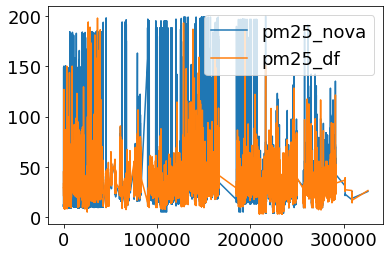

In [26]:
## Uncertainty ###
importlib.reload(DQf_f)
datos = df.copy()
uncertainty = DQf_f.uncertainty(datos['pm25_nova'], datos['pm25_df'])
#_, uncertainty = DQf_f.uncertainty_1_feat(datos)

In [90]:
uncert = pd.DataFrame(data={'uncert':[0.79, 0.75], 'rmse':[13.95, 36.88]}, index=['pm2.5', 'pm10'])
uncert

,uncert,rmse
pm2.5,0.79,13.95
pm10,0.75,36.88


In [3]:
accu = pd.DataFrame(data={'DF':[0.6449, 0.6335, 0.7666, 0.6059, 0.7025, 0.6228, 0.687, 0.786], 'NOVA':[0.5217, 0.6514, 0.6824, 0.5822, 0.598, 0.6176, 0.545, 0.7591]}, index=['1','119','140','149','171','211','231','238'])
accu

,DF,NOVA
1,0.64,0.52
119,0.63,0.65
140,0.77,0.68
149,0.61,0.58
171,0.70,0.60
211,0.62,0.62
231,0.69,0.55
238,0.79,0.76


In [183]:
## Consistency ###
importlib.reload(DQf_f)
datos = df.copy()
consistency = DQf_f.consistency(datos)

In [181]:
## Outliers ###
importlib.reload(DQf_f)
datos = df.copy()
_, outliers = DQf_f.outliers(datos)

d:\OneDrive - Universidad de Antioquia\PhD\Pasantia\W en Deusto\DataQualityIndex\Deportes\DQ_measure_f_frAAgile.py:405: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [97]:
## Concordance ###
importlib.reload(DQf_f)
datos = df.copy()

concord = DQf_f.concordance(datos['pm25_nova'], datos['pm25_df'])

concord = pd.DataFrame(data={'concord':[0.51, 0.50]}, index=['pm2.5','pm10'])
concord

The concordance value is: 0.27


,concord
pm2.5,0.51
pm10,0.50


In [22]:
## Duplicados ###

muestra

,Jugadora,Sesion,Tipo,Posicion,Diasemana,Date,WeekCalendar,WeekTeam,WeekMatchDay,Starthour(t),...,[55-100]w/kg(m),[10-25.5]w/kgCnt,[25.5-35]w/kgCnt,[35-55]w/kgCnt,[55-100]w/kgCnt,[10-25.5]w/kg(ms),[25.5-35]w/kg(ms),[35-55]w/kg(ms),[55-100]w/kg(ms),Signal
0,Andrea,42,Partido,2. ALA-CIERRE,NaN,17/10/2020,0,0,0,12:10:27,...,210088.00,138,36,36,14,304263,159867,128304,67311,UWB
1,Andrea,42,Partido,2. ALA-CIERRE,NaN,17/10/2020,0,0,0,12:10:27,...,136972.00,82,20,21,8,167049,82053,76761,43740,UWB
2,Andrea,42,Partido,2. ALA-CIERRE,NaN,17/10/2020,0,0,0,13:19:16,...,73116.00,56,16,15,6,137214,77814,51543,23571,UWB
3,Andrea,47,Partido,2. ALA-CIERRE,NaN,24/10/2020,0,0,0,19:14:53,...,210136.00,139,38,41,12,292923,138888,208440,61749,UWB
4,Andrea,47,Partido,2. ALA-CIERRE,NaN,24/10/2020,0,0,0,19:14:53,...,196159.00,92,24,28,11,171882,86859,153846,57186,UWB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Andrea,170,Partido,2. ALA-CIERRE,NaN,22/05/2021,0,0,0,13:32:21,...,206393.00,73,18,14,13,176580,78516,80676,61911,UWB
73,Andrea,170,Partido,2. ALA-CIERRE,NaN,22/05/2021,0,0,0,13:32:21,...,206393.00,68,18,14,13,173529,78516,80676,61911,UWB
74,Andrea,175,Roldan Fútbol Sala Femenino,2. ALA-CIERRE,NaN,28/05/2021,0,0,0,18:01:05,...,273527.00,106,49,50,16,335151,254232,283230,79920,UWB
75,Andrea,175,Roldan Fútbol Sala Femenino,2. ALA-CIERRE,NaN,28/05/2021,0,0,0,18:01:05,...,139477.00,59,24,21,8,183384,136674,138834,42120,UWB


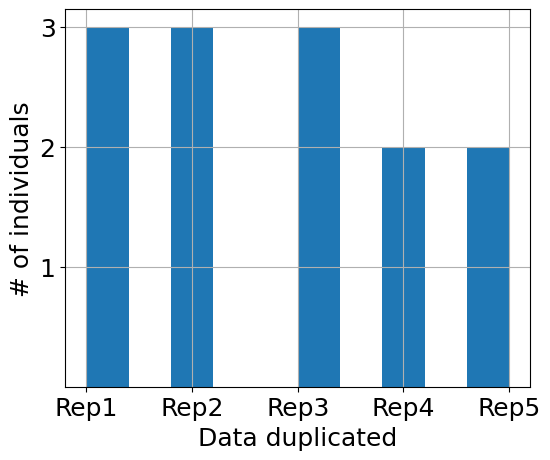

In [246]:

dupli = pd.DataFrame([["28/03/2021'\n'11:09:33"], ["28/03/2021'\n'11:09:33"], ["28/03/2021'\n'11:09:33"], ["17/04/2021'\n'18:40:05"], ["17/04/2021'\n'18:40:05"], ["17/04/2021'\n'18:40:05"], ["24/04/2021'\n'19:02:35"], ["24/04/2021'\n'19:02:35"], ["24/04/2021'\n'19:02:35"], 
                      ["8/5/2021'\n'12:04:13"], ["8/5/2021'\n'12:04:13"], ["22/05/2021'\n'13:32:21"], ["22/05/2021'\n'13:32:21"]], columns=['date'])

dupli = pd.DataFrame([["Rep1"], ["Rep1"], ["Rep1"], ["Rep2"], ["Rep2"], ["Rep2"], ["Rep3"], ["Rep3"], ["Rep3"], ["Rep4"], ["Rep4"], ["Rep5"], ["Rep5"]], columns=['date'])

#dupli = dupli.set_index('date')
plt.figure(figsize=(6, 5), dpi=100)
plt.hist(dupli)
plt.yticks([1,2,3])
#plt.xticks(rotation=25)
plt.xlabel('Data duplicated')
plt.ylabel('# of individuals')
plt.grid(True)
plt.savefig('dupli_sports.eps', format='eps')
plt.show()

<Axes: >

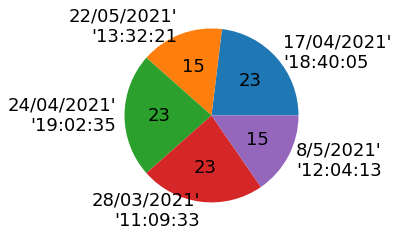

In [242]:
def fmt(x):
    return '{:.0f}'.format(x)

dupli.pivot_table(index=['date'], aggfunc='size').plot.pie(autopct=fmt)

In [243]:
dupli.pivot_table(index=['date'], aggfunc='size')

date
17/04/2021'\n'18:40:05    3
22/05/2021'\n'13:32:21    2
24/04/2021'\n'19:02:35    3
28/03/2021'\n'11:09:33    3
8/5/2021'\n'12:04:13      2
dtype: int64

In [242]:
DQ_dim = {'Completeness': 0.66, 'Uncertainty': 0.83, 'Precision': 0.33}

DQ_Index = 0
for d in DQ_dim.keys():
    DQ_Index += round((1/3)*DQ_dim[d],2)
    #DQ_Index += round((frame.dimensions[d]/sum(frame.dimensions.values())*DQ_dim[d]),2)
print(DQ_dim)
print('DQ_index:',round(DQ_Index,2))

{'Completeness': 0.66, 'Uncertainty': 0.83, 'Precision': 0.33}
DQ_index: 0.61


In [ ]:
diversity

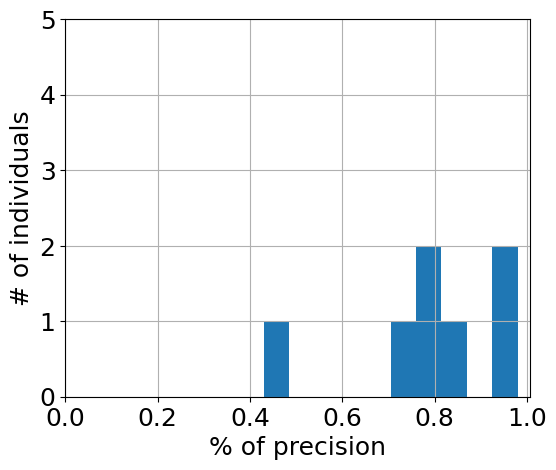

In [134]:
import matplotlib.ticker as mticker

precision = pd.DataFrame(precis)
#precision = pd.DataFrame(diversity, index=['0'])

width = .35 # width of a bar
plt.figure(figsize=(6, 5), dpi=100)
plt.rc('axes.formatter', useoffset=False)
plt.rc('font', size=18)
plt.hist(precision.T)#, bins=40)
#plt.bar(precision.columns, list(precision.T['Compl'].values))#, bins=40)
plt.xlabel('% of precision')
plt.ylabel('# of individuals')
#plt.xticks(rotation=90)
plt.grid(True)
#plt.yscale('log')
plt.ylim(0,5)
#plt.xlim(0,1.1)
#ax=plt.gca()
#ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
#ax.yaxis.get_major_formatter().set_scientific(False)
#ax.yaxis.get_major_formatter().set_useOffset(False)
plt.xticks([0,0.2,0.4,0.6,0.8,1])
#plt.yticks([1,2,4,6,8,10,100,200,300])
plt.savefig('precis_air.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


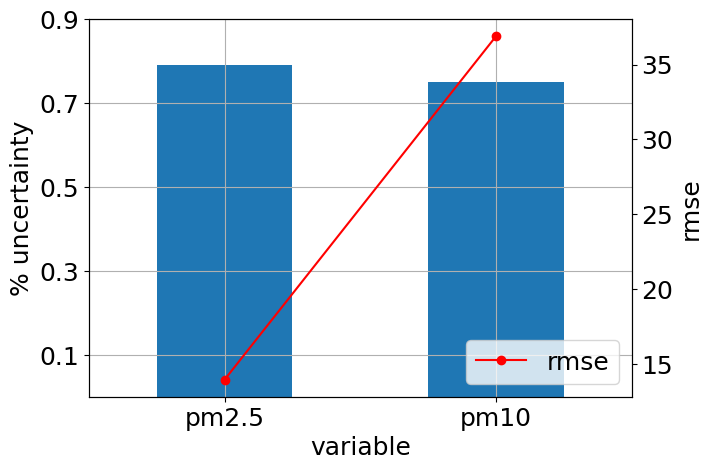

In [104]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
plt.rc('font', size=18)

# plot on new instance
uncert.plot.bar(y='uncert',ax=ax, rot=0)
ax.get_legend().remove()
plt.yticks([0.1,0.3,0.5,0.7,0.9])
plt.grid(True)

# create a twinx axis
ax1 = ax.twinx()

# plot the other two columns on this axis
uncert.plot.line(y='rmse', ax=ax1, color='red', marker='o')

# set y-axes labels:
ax.set_ylabel('% uncertainty')
ax1.set_ylabel('rmse')

# set x-axis label
ax.set_xlabel('variable')


plt.legend(loc='lower right')
plt.savefig('uncert_air.eps', format='eps')
plt.show()


In [16]:
list(accu.index)

['1', '119', '140', '149', '171', '211', '231', '238']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


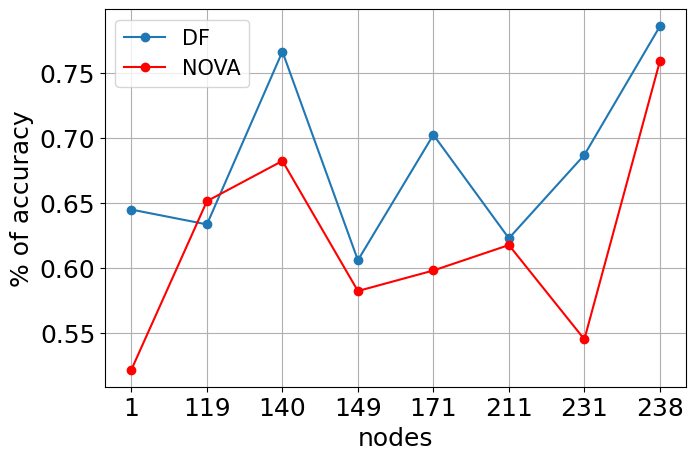

In [89]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(7.5, 5), dpi=100)
plt.rc('axes.formatter', useoffset=False)
plt.rc('font', size=15)

# plot on new instance
accu.plot.line(y='DF',ax=ax, marker='o')
accu.plot.line(y='NOVA',marker='o', ax=ax, color='red')
ax.set_xlabel('nodes')
ax.set_ylabel('% of accuracy')
plt.grid(True)

plt.legend(loc='upper left')
plt.savefig('acc_air.eps', format='eps')
plt.show()


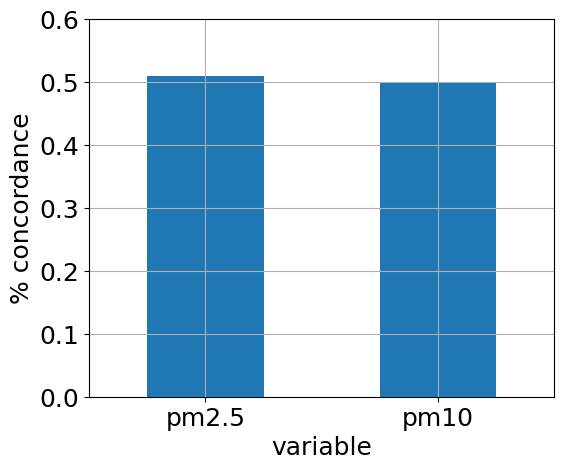

In [102]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
plt.rc('font', size=18)

# plot on new instance
concord.plot.bar(y='concord',ax=ax, rot=0)
ax.get_legend().remove()
plt.ylim(0,0.6)
#plt.yticks([0.1,0.3,0.5,0.7,0.9])
plt.grid(True)

# set y-axes labels:
ax.set_ylabel('% concordance')

# set x-axis label
ax.set_xlabel('variable')


#plt.legend(loc='lower right')
plt.savefig('conc_air.eps', format='eps')
plt.show()

In [124]:
pd.Series(complet.T.values.tolist()).value_counts()
#pd.Series(list2).value_counts()

[0.6589]    156
[0.6729]     73
[0.6371]     12
[0.0497]      1
[0.0]         1
[0.4219]      1
[0.6348]      1
[0.6488]      1
Name: count, dtype: int64

In [28]:
pd.DataFrame(div_all, index=[0]).T.mean()

0    0.38
dtype: float64

In [20]:
importlib.reload(DQf)
#datos = df.copy()
datos = muestra.copy()
DQ_dim = {}
if frame.dimensions['Consistency'] > 0:
    cons,noCons,muestra = DQf.consistency(datos, clean=False)
    if not pd.isna(cons):
        DQ_dim['Consistency'] = cons

if frame.dimensions['Diversity'] > 0:
    div, _, muestra, div_all = DQf.diversity(datos, clean=False)
    if not pd.isna(div):
        DQ_dim['Diversity'] = div
  
if frame.dimensions['Completeness'] > 0:
    compl, muestra = DQf.completeness(datos, clean=False)
    if not pd.isna(compl):
        DQ_dim['Completeness'] = compl

if frame.dimensions['Duplicity'] > 0:
    dup,_,muestra = DQf.duplicity(datos, clean=False)
    if not pd.isna(dup):
        DQ_dim['Duplicity'] = dup

if frame.dimensions['Volume'] > 0:
    vol,muestra = DQf.volume(datos, clean=False)
    if not pd.isna(vol):
        DQ_dim['Volume'] = vol

if frame.dimensions['Precision'] > 0:
    prec,muestra = DQf.precision(datos)
    if not pd.isna(prec):
        DQ_dim['Precision'] = prec

if frame.dimensions['Outliers'] > 0:
    out,muestra = DQf.outliers(datos)
    if not pd.isna(out):
        DQ_dim['Outliers'] = out   

if frame.dimensions['Uncertainty'] > 0:
    unc,muestra = DQf.uncertainty(datos)
    if not pd.isna(unc):
        DQ_dim['Uncertainty'] = unc

DQ_Index = 0
for d in DQ_dim.keys():
    DQ_Index += round((frame.dimensions[d]/sum(frame.dimensions.values())*DQ_dim[d]),2)
print(DQ_dim)
print('DQ_index:',round(DQ_Index,2))

{'Diversity': 0.38, 'Completeness': 0.98, 'Duplicity': 0.83, 'Volume': 0.0, 'Precision': 0.38, 'Uncertainty': 0.42}
DQ_index: 0.49


In [142]:
#DQ_dim = {'Completeness': 0.699, 'Uncertainty': 0.932, 'Precision': 0.6276}

#DQ_dim = {'Completeness': 0.66, 'Redundancy': 0.83, 'Precision': 0.33, 'Uniqueness': 0.38} #  --> Sports

DQ_dim = {'Completeness': 0.70, 'Precision': 0.80, 'Uncertainty': 0.77, 'Accuracy': 0.65, 'Concordance': 0.50} #  --> Air

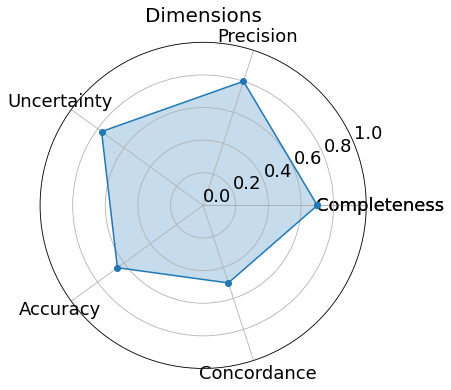

In [143]:

dims = list(DQ_dim.keys())
dims = [*dims, dims[0]]

scores = list(DQ_dim.values())
scores = [*scores, scores[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(dims))

plt.figure(figsize=(6,6))
plt.subplot(polar=True)
plt.plot(label_loc, scores, 'o-')
plt.title('Dimensions', size=20)
plt.thetagrids(np.degrees(label_loc), labels=dims)
plt.fill(label_loc, scores, alpha=0.25)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.ylim(0,1)
plt.savefig('radial_air.svg', format='svg')
plt.show()

In [ ]:
ref = pd.Series([1,22,3,4,5,6])
res = muestra['Sesion']
res.reset_index(inplace=True, drop=True)

pd.concat([res, ref], axis=1)
#muestra.reset_index(drop=True)



In [ ]:
print((df['Sesion'].nunique(dropna=True)/len(df['Sesion'])))


((np.log(df['Sesion'].value_counts()/len(df['Sesion']))*(df['Sesion'].value_counts()/len(df['Sesion']))).sum()*-1)/df['Sesion'].nunique(dropna=True)

df['Sesion'].values()


In [8]:
### COMPARACIÓN CÁLCULO DE DIVERSIDAD
# https://ecopy.readthedocs.io/en/latest/diversity.html

especies = {'A':1,
            'B':1}

#########################################
# No hay ponderación o pesos/importancia de cada especie
mio = (len(especies)/sum(especies.values()))

######################################
# Hay peso para cada especie de acuerdo con el número de veces que se repite
shannon = 0
for d in especies:
    shannon += (especies[d]/sum(especies.values()))*np.log(especies[d]/sum(especies.values()))

shannon = 1 - (abs(shannon)/np.log(len(especies)))

######################################
# Hay peso para cada especie de acuerdo con el número de veces que se repite
gini = 0
for d in especies:
    gini += (especies[d]/sum(especies.values()))**2

gini = 1 - gini

######################################
# Hay peso para cada especie de acuerdo con el número de veces que se repite
simpson = 0
for d in especies:
    simpson += (especies[d]/sum(especies.values()))**2

print('Propuesta:',round(mio,2),'\nShannon:',round(shannon,2),'\nGini-Simpson:',round(gini,2),'\nSimpson:',round(simpson,2),'\n*********************\nTOTAL ESPECIES:',len(especies),'\nTOTAL DATOS:',sum(especies.values()))

Propuesta: 1.0 
Shannon: 0.0 
Gini-Simpson: 0.5 
Simpson: 0.5 
*********************
TOTAL ESPECIES: 2 
TOTAL DATOS: 2


In [6]:
importlib.reload(DQf)

if frame.dimensions['legibility'] > 0:
    cons,noCons,muestra = DQf.consistency(muestra, clean=True)
    print('Si')


NameError: name 'frame' is not defined

In [ ]:
importlib.reload(DQf)

if frame.dimensions['variability'] > 0:
    var, deleted, muestra = DQf.variability(muestra, clean=True)
    print('Si')


In [ ]:
importlib.reload(DQf)

if frame.dimensions['completeness'] > 0:
    compl, muestra = DQf.completeness(muestra, clean=True)
    print('Si')


In [ ]:
importlib.reload(DQf)

if frame.dimensions['redundancy'] > 0:
    red,_,muestra = DQf.redundancy(muestra, clean=True)
    print('Si')


In [ ]:
frame.dimensions

In [ ]:
frame.dimensions.values()
DQ_Index = 0
for d, v in zip(frame.dimensions.keys(), [cons, var, compl, red]):
    DQ_Index += round((frame.dimensions[d]/sum(frame.dimensions.values())*v),2)
    print(round((frame.dimensions[d]/sum(frame.dimensions.values())*v),2), '-', round((frame.dimensions[d]/sum(frame.dimensions.values())),2), '-', v)
print('DQ_index:',round(DQ_Index,2))

In [ ]:
importlib.reload(DQf)
DQf.volume(muestra, clean=False)

In [ ]:
importlib.reload(DQf)
DQf.precision(muestra)

In [ ]:
res = pd.DataFrame(1 - (muestra.std(numeric_only=True)/muestra.mean(numeric_only=True)), columns=['prec'])
res['cero'] = 0
res['prec'] = res[['cero','prec']].max(axis=1, skipna=False)
#res['res'] = max('cero','prec')
res['prec'].mean()
#res

In [ ]:
res = (muestra.isnull().sum(axis=0)/len(muestra))
list(res[res>0.5].index)


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Distancia = ['Selection','Starthour', 'FinalHour', 'Distance(m)','ExplosiveDist(m)','HIBD(m)','[0-45]%(m)','[45-65]%(m)',
'[65-75]%(m)','[75-85]%(m)','[85-95]%(m)','[95-100]%(m)','[0-6]km/h(m)','[6-9]km/h(m)','[9-12]km/h(m)','[12-15]km/h(m)',
'[15-18]km/h(m)','[18-21]km/h(m)','[21-50]km/h(m)','[0-45]%Cnt','[45-65]%Cnt','[65-75]%Cnt','[75-85]%Cnt','[85-95]%Cnt',
'[95-100]%Cnt','[0-6]km/hCnt','[6-9]km/hCnt','[9-12]km/hCnt','[12-15]km/hCnt','[15-18]km/hCnt','[18-21]km/hCnt',
'[21-50]km/hCnt','[0-45]%(ms)','[45-65]%(ms)','[65-75]%(ms)','[75-85]%(ms)','[85-95]%(ms)','[95-100]%(ms)','[0-6]km/h(ms)',
'[6-9]km/h(ms)','[9-12]km/h(ms)','[12-15]km/h(ms)','[15-18]km/h(ms)','[18-21]km/h(ms)','[21-50]km/h(ms)']

Aceleracion =['Selection','Starthour', 'FinalHour','Accelerations','Decelerations','MAXAcc(m/s²)','MAXDec(m/s²)',
'AVGAcc(m/s²)','AVGDec(m/s²)','Dif.ACC/DEC','HighAccCnt','HighDecCnt','HighAcc(m)','HighDec(m)','HighAcc(ms)',
'HighDec(ms)','[01]m/s²(m)','[12]m/s²(m)','[23]m/s²(m)','[34]m/s²(m)','[45]m/s²(m)','[56]m/s²(m)','[610]m/s²(m)',
'[-10]m/s²(m)','[-2-1]m/s²(m)','[-3-2]m/s²(m)','[-4-3]m/s²(m)','[-5-4]m/s²(m)','[-6-5]m/s²(m)','[-10-6]m/s²(m)',
'[050]%(m)','[5060]%(m)','[6070]%(m)','[7080]%(m)','[8090]%(m)','[90100]%(m)','[-500]%(m)','[-60-50]%(m)','[-70-60]%(m)',
'[-80-70]%(m)','[-90-80]%(m)','[-100-90]%(m)','[01]m/s²Cnt','[12]m/s²Cnt','[23]m/s²Cnt','[34]m/s²Cnt','[45]m/s²Cnt',
'[56]m/s²Cnt','[610]m/s²Cnt','[-10]m/s²Cnt','[-2-1]m/s²Cnt','[-3-2]m/s²Cnt','[-4-3]m/s²Cnt','[-5-4]m/s²Cnt','[-6-5]m/s²Cnt',
'[-10-6]m/s²Cnt','[050]%Cnt','[5060]%Cnt','[6070]%Cnt','[7080]%Cnt','[8090]%Cnt','[90100]%Cnt','[-500]%Cnt','[-60-50]%Cnt',
'[-70-60]%Cnt','[-80-70]%Cnt','[-90-80]%Cnt','[-100-90]%Cnt','[01]m/s²(ms)','[12]m/s²(ms)','[23]m/s²(ms)','[34]m/s²(ms)',
'[45]m/s²(ms)','[56]m/s²(ms)','[610]m/s²(ms)','[-10]m/s²(ms)','[-2-1]m/s²(ms)','[-3-2]m/s²(ms)','[-4-3]m/s²(ms)',
'[-5-4]m/s²(ms)','[-6-5]m/s²(ms)','[-10-6]m/s²(ms)','[050]%(ms)','[5060]%(ms)','[6070]%(ms)','[7080]%(ms)','[8090]%(ms)',
'[90100]%(ms)','[-500]%(ms)','[-60-50]%(ms)','[-70-60]%(ms)','[-80-70]%(ms)','[-90-80]%(ms)','[-100-90]%(ms)']

Salud = ['Selection','Starthour', 'FinalHour','HRDuration','MAXHR(bpm)','AVGHR(bpm)','Avg(%ofMax)','HighHR(m)',
'HighHRCnt','HighHR(ms)','[50-60]%(m)','[60-70]%(m)','[70-80]%(m)','[80-90]%(m)','[90-100]%(m)','[100-200]%(m)',
'[50-60]%Cnt','[60-70]%Cnt','[70-80]%Cnt','[80-90]%Cnt','[90-100]%Cnt','[100-200]%Cnt','[50-60]%(ms)','[60-70]%(ms)',
'[70-80]%(ms)','[80-90]%(ms)','[90-100]%(ms)','[100-200]%(ms)']

Velocidad = ['Selection','Starthour', 'FinalHour','SprintAbsCnt','SprintRelCnt','HSRAbsCnt','HSRRelCnt','SprintAbs(m)',
'SprintRel(m)','HSRAbs(m)','HSRRel(m)','MAXSpeed(km/h)','AVGSpeed(km/h)','SprintmaxCnt','Sprintmax(m)','Sprintmax(ms)',
'HSRAbsRep','HSRRelRep','SprintAbsRep','SprintRelRep','SprintmaxRep']

Eventos = ['Selection','Starthour', 'FinalHour','Horiz.ImpactsCnt','Stepscount','StepBalance(%)','Jumpscount','JumpsAVGTakeoff(g)',
'JumpsAVGLanding(g)','HighTakeoffCnt','HighLandingCnt','Landing[0-3]GCnt','Landing[3-5]GCnt','Landing[5-8]GCnt','Landing[8-100]GCnt',
'Takeoff[0-3]GCnt','Takeoff[3-5]GCnt','Takeoff[5-8]GCnt','Takeoff[8-100]GCnt']

Frecuencia = ['Selection','Starthour', 'FinalHour','FrecMAX(hz)','FrecAVG(hz)','Hz*GMAX','Hz*GAVG','[0-0,5](ms)',
'[0,5-1](ms)','[1-1,5](ms)','[1,5-100](ms)']

PlayerLoad = ['Selection','Starthour', 'FinalHour','PlayerLoad','PlayerLoadhorizontal','PlayerLoadvertical',
'PlayerLoadantero-posterior','PlayerLoadmedio-lateral',]

Energia = ['Selection','Starthour', 'FinalHour','Powermet','PowermetAvg','Edimax','HMLD','HMLDcnt','EnergyExpenditure',
'DSL','[10-25,5]w/kg(m)','[25,5-35]w/kg(m)','[35-55]w/kg(m)','[55-100]w/kg(m)','[10-25,5]w/kgCnt','[25,5-35]w/kgCnt',
'[35-55]w/kgCnt','[55-100]w/kgCnt','[10-25,5]w/kg(ms)','[25,5-35]w/kg(ms)','[35-55]w/kg(ms)','[55-100]w/kg(ms)',
'Signal',]

agrupamiento = ['Date', 'Sesion', 'Selection']
muestra.set_index(agrupamiento, inplace=True)


#seccion.groupby(agrupamiento, group_keys=True)[Distancia].apply(lambda x:x)


In [ ]:
importlib.reload(DQf)
_,muestra = DQf.outliers(muestra, clean=True)

#seccion[Distancia].plot()
#seccion[Distancia].corr()



In [ ]:
filter = ['DrillsDuration(t)','Distance(m)','ExplosiveDist(m)','HIBD(m)','Accelerations(#)','MAXAcc(m/s²)','MAXDec(m/s²)','HighAcc(m)','HighDec(m)',
          'MAXHR(bpm)','HighHR(ms)','HighHRCnt(#)','MAXSpeed(km/h)','AVGSpeed(km/h)','SprintmaxCnt(#)','Sprintmax(m)','Sprintmax(ms)',
          'Stepscount(#)','Jumpscount(#)']

filter = list(set(filter) - (set(filter) - set(muestra.columns)))


seccion = muestra[filter]
seccion['DrillsDuration(t)'] = pd.to_timedelta(seccion['DrillsDuration(t)'].astype(str)).dt.total_seconds()
seccion.rename({'DrillsDuration(t)':'DrillsDuration(s)'}, axis=1, inplace=True)
_,_,seccion = DQf.redundancy(seccion, clean=True)

In [ ]:
# Show high correlated variables as a List
threshold_corr = 0.8
corr_matrix = seccion.corr(numeric_only=True).abs()
high_corr_var = np.where(corr_matrix > threshold_corr)
corr_matrix = seccion.corr(numeric_only=True)
high_corr_matrix = pd.DataFrame(columns=['Var2','Corr'])
for x,y in zip(*high_corr_var):
    if x != y and x < y:
        high_corr_matrix = pd.concat([high_corr_matrix, pd.DataFrame({
                                                                'Var2':corr_matrix.columns[y],
                                                                'Corr':corr_matrix.iat[x,y]}, 
                                                                index=[corr_matrix.columns[x]])], axis = 0, ignore_index = False)

#high_corr_matrix

In [ ]:
# Show high correlated variables as a Matrix
alta_corr = pd.DataFrame(np.NaN, columns=high_corr_matrix.Var2.unique(), index=high_corr_matrix.index.unique())
for x in range(len(high_corr_matrix)):
    row = high_corr_matrix.iloc[[x]].index.values[0]
    col = high_corr_matrix.iloc[[x]].Var2.values[0]
    alta_corr.at[row,col] = high_corr_matrix.iloc[[x]].Corr.values[0]
#alta_corr


In [ ]:
# Best performance
best = seccion.loc[seccion[['Distance(m)']].idxmax()]

# Preliminar individual results for each player
print('Player:',player)
print('')
print('****** Best Performance ******')
print('Sesion:',best.index[0][1])
print('Date:',best.index[0][0].date())
for c in seccion.columns:
    print(str(c)+':',best[c].max())

print('')
print('****** Trends ******')
res = False
for x,y in zip(high_corr_matrix.index, high_corr_matrix.Var2):
    print(str(x),'and',str(y)+':','True')

In [ ]:
data1

In [ ]:
# Create some mock data
variable1 = 'Accelerations(#)'
variable2 = 'MAXHR(bpm)'
index = 'Sesion'
data1 = seccion.loc[:, :, 'Partido completo'][variable1]
data2 = seccion.loc[:, :, 'Partido completo'][variable2]

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel(index)
ax1.set_ylabel(variable1.split('(')[1][:-1], color=color)
ax1.plot(np.sort(data1.index.get_level_values(index)), data1.interpolate(method='linear'), color=color, label=variable1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=0)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(variable2.split('(')[1][:-1], color=color)  # we already handled the x-label with ax1
ax2.plot(np.sort(data1.index.get_level_values(index)), data2.interpolate(method='linear'), color=color, label=variable2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x', labelrotation=0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend()
plt.show()

In [ ]:
np.sort(data1.index.get_level_values('Sesion'))


In [ ]:
seccion.xs(('Partido completo',42), level=('Selection', 'Sesion'))

### PCA

In [122]:
importlib.reload(DQf)
importlib.reload(Gf)
completos = df[df['Selection'] == 'Partido completo']


In [123]:
datos = completos.copy()

_,datos = DQf.volume(datos, clean=True)
_,noLeg,datos = DQf.consistency(datos, clean=True)
_,_,datos = DQf.diversity(datos, clean=True)

# Show correlated variables as a List
threshold_corr = 0.9
corr_matrix = datos.corr(numeric_only=True).abs()
corr_var = np.where(corr_matrix > threshold_corr)
corr_matrix = datos.corr(numeric_only=True)
corr_var_matrix = pd.DataFrame(columns=['Var2','Corr'])
for x,y in zip(*corr_var):
    if x != y and x < y:
        corr_var_matrix = pd.concat([corr_var_matrix, pd.DataFrame({
                                                                'Var2':corr_matrix.columns[y],
                                                                'Corr':corr_matrix.iat[x,y]}, 
                                                                index=[corr_matrix.columns[x]])], axis = 0, ignore_index = False)


d:\OneDrive - Universidad de Antioquia\PhD\Pasantia\W en Deusto\DataQualityIndex\Deportes\DQ_measure_f.py:85: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
var_corr = pd.DataFrame(np.NaN, columns=corr_var_matrix.Var2.unique(), index=corr_var_matrix.index.unique())
for x in range(len(corr_var_matrix)):
    row = corr_var_matrix.iloc[[x]].index.values[0]
    col = corr_var_matrix.iloc[[x]].Var2.values[0]
    var_corr.at[row,col] = corr_var_matrix.iloc[[x]].Corr.values[0]


In [ ]:
ref = 'Distance(m)'
filtro = list(corr_var_matrix[corr_var_matrix.index == ref]['Var2'])
filtro = [ x for x in filtro if "]%" not in x ]
#filtro = [filtro[0], ref]
filtro.append(ref)


In [ ]:
len(list(corr_var_matrix[['Var2']].itertuples(index=True, name=None)))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations

cont = 0
#for comb in list(corr_var_matrix[['Var2']].itertuples(index=True, name=None)):
for comb in combinations(['Takeoff[8-100]GCnt', 'Hz*GAVG', 'FrecAVG(hz)','SprintRelRep'],2):
    comb = list(comb)

    x = datos.loc[:, comb].values
    x = StandardScaler().fit_transform(x) # normalizing the features

    if len(comb) <= 2:
        componentes = 2
    else:
        componentes = 'mle'

    normalized_datos = pd.DataFrame(x,columns=comb)

    pca_datos = PCA(n_components=componentes)
    principalComponents_datos = pca_datos.fit_transform(x)

    PCA_cols = [ 'PCA'+str(x+1) for x in range(principalComponents_datos.shape[1])]

    principal_datos_Df = pd.DataFrame(data = principalComponents_datos
                , columns = PCA_cols)

    pca_datos.explained_variance_ratio_.sum(), principalComponents_datos.shape

    if cont > 0 and cont <= 20:
        targets = list(datos['Posicion'].unique())

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
        ax1.set_xlabel(comb[0],fontsize=10)
        ax1.set_ylabel(comb[1],fontsize=10)
        ax1.set_title("Principal Component Analysis of Datos",fontsize=10)

        for target in targets:
            indicesToKeep = datos['Posicion'] == target
            ax1.scatter(principal_datos_Df.loc[indicesToKeep, PCA_cols[0]]
                    , principal_datos_Df.loc[indicesToKeep, PCA_cols[1]], s = 25)

        ax1.legend(targets,prop={'size': 8})

        ax2.set_xlabel(comb[0],fontsize=10)
        ax2.set_ylabel(comb[1],fontsize=10)
        ax2.set_title("Real Values of Datos",fontsize=10)

        for target in targets:
            indicesToKeep = datos['Posicion'] == target
            ax2.scatter(datos.loc[indicesToKeep, comb[0]]
                    , datos.loc[indicesToKeep, comb[1]], s = 25)

        ax2.legend(targets,prop={'size': 8})

        plt.show()


    cont += 1

In [ ]:

plt.figure()
plt.figure(figsize=(10,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Hz*GAVG',fontsize=20)
plt.ylabel('FrecAVG(hz)',fontsize=20)
plt.title("Principal Component Analysis of Datos",fontsize=20)
targets = list(datos['Posicion'].unique())

for target in targets:
    indicesToKeep = datos['Posicion'] == target
    plt.scatter(datos.loc[indicesToKeep, 'Hz*GAVG']
               , datos.loc[indicesToKeep, 'FrecAVG(hz)'], s = 50)

plt.legend(targets,prop={'size': 15})

In [ ]:
datos.head()

interesantes = ['Hz*GAVG', 'FrecAVG(hz)','SprintRelCnt(#)', 'Jumpscount(#)', 'SprintRelRep', 'Takeoff[8-100]GCnt']
#datos.columns[datos.columns.str.contains('8-100')]
datos[interesantes].corr()


In [157]:
importlib.reload(DQf)

new = 'SprintRelCnt(#)'

interesantes = ['Hz*GAVG', 'FrecAVG(hz)','SprintRelCnt(#)', '[0,5-1](ms)', '[1-1,5](ms)', 'Takeoff[3-5]GCnt', 'Takeoff[5-8]GCnt', 'Takeoff[8-100]GCnt', 'StepBalance(%)', 'JumpsAVGTakeoff(g)']
#interesantes.append(new)
# 'Hz*GAVG' --> PORTERA, PIVOT
# 'StepBalance(%)' --> CIERRE
# '[1-1,5](ms)' --> ALA, CIERRE
# 'Takeoff[3-5]GCnt' --> PIVOT
# 'Takeoff[5-8]GCnt' --> ALA, ALA-CIERRE
# 'Takeoff[8-100]GCnt' --> ALA-CIERRE, ALA-PIVOT
# 'JumpsAVGTakeoff(g)' --> ALA-CIERRE, ALA-PIVOT, ALA, PIVOT(Parcial)
# 'SprintRelCnt(#)' --> ALA-PIVOT, ALA
# '[0,5-1](ms)'  --> ALA-CIERRE


res = datos[interesantes]
res['Posicion'] = datos['Posicion']
#_,res = DQf.outliers(res, clean=True)

targets = list(res['Posicion'].unique())
targets.sort()
for p,s in zip(targets, range(6)):
    indicesToKeep = res['Posicion'] == p
    res.loc[indicesToKeep, 'Hz*GAVG'] += s/100

<Figure size 432x288 with 0 Axes>

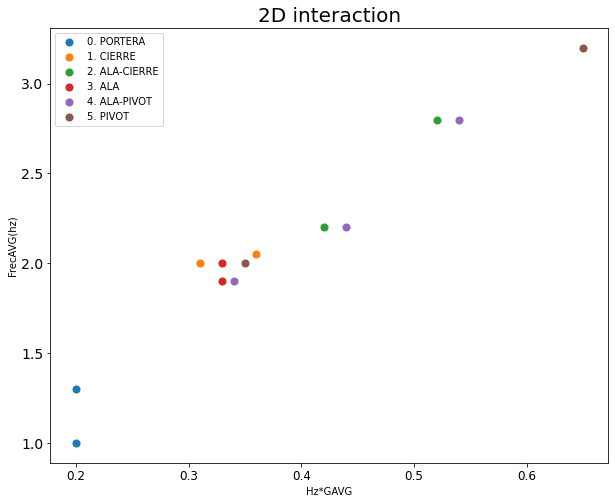

In [164]:
# fig = plt.figure(figsize=(10,8))

# ax = plt.axes(projection='3d')

# ax.set_xlabel('Hz*GAVG',fontsize=10)
# ax.set_ylabel('FrecAVG(hz)',fontsize=10)
# ax.set_zlabel(new,fontsize=10)

targets = list(res['Posicion'].unique())
targets.sort()

# for target in targets:
#     indicesToKeep = res['Posicion'] == target
#     ax.scatter3D(res.loc[indicesToKeep, 'Hz*GAVG'],
#                  res.loc[indicesToKeep, 'FrecAVG(hz)'],
#                  res.loc[indicesToKeep, new], s = 50)

# plt.legend(targets,prop={'size': 10})

# plt.show()

plt.figure()
plt.figure(figsize=(10,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Hz*GAVG',fontsize=10)
plt.ylabel('FrecAVG(hz)',fontsize=10)
plt.title("2D interaction",fontsize=20)

for target in targets:
    indicesToKeep = res['Posicion'] == target
    plt.scatter(res.loc[indicesToKeep, 'Hz*GAVG'],
               res.loc[indicesToKeep, 'FrecAVG(hz)'], s = 50)

plt.legend(targets,prop={'size': 10})
plt.show()


import plotly.express as px
fig = px.scatter_3d(res, x='Hz*GAVG', y='FrecAVG(hz)', z=new,
              color='Posicion', width=1000, height=800, title='3D interaction')
fig.show()



In [163]:
res = datos.groupby(['Jugadora','Posicion'])[['Hz*GAVG', 'FrecAVG(hz)', new]].median()#agg(lambda x: pd.Series.mode(x)[0])
res.reset_index(['Posicion'], inplace=True)
for p,s in zip(targets, range(6)):
    indicesToKeep = res['Posicion'] == p
    res.loc[indicesToKeep, 'Hz*GAVG'] += s/100
res

,Posicion,Hz*GAVG,FrecAVG(hz),SprintRelCnt(#)
Jugadora,,,,
Alba,4. ALA-PIVOT,0.44,2.20,1.0
Almudena,0. PORTERA,0.20,1.30,0.0
Andrea,2. ALA-CIERRE,0.42,2.20,0.0
Angela,5. PIVOT,0.35,2.00,0.0
Consuelo,4. ALA-PIVOT,0.54,2.80,0.0
Cristi,3. ALA,0.33,1.90,1.0
Cristina,0. PORTERA,0.20,1.00,0.0
Lola,4. ALA-PIVOT,0.34,1.90,0.0
Marian,3. ALA,0.33,2.00,0.0
